### *“Success is stumbling from failure to failure with no loss of enthusiasm.”* - Winston S. Churchill 

You heart SQL!

----

YOUR NAME HERE: TJ Augustine

----

# HW 7: Selecting in SQL

First, let me give you a little background about SQL and SQLite.

## SQL vs. SQLite

You have been using SQL in the SQLZOO tutorials.  SQL is a programming language to manipualte data in a relational database.  This means that SQL allows you to interact with the database, but it is NOT in itself a database.

There are heavyweights databases that work with SQL, such as MySQL, SQL Server or PostgreSQL. However, SQLite is another useful RDBMS (Relational Database Management System) that is very simple to set up and operate.  Two distinct features of SQLite that make it attractive for our needs are as follows.

*    SQLite does not require servers: That is, there are no server processes that need to start, stop or be configured. There is no need for database administrators to assign instances or manage user access permissions.  

*    SQLite involves simple database files: A SQLite database is a single ordinary disk file that can be stored in any directory. This also makes it simple to share since database files can easily be copied onto a memory stick or sent through email.

In summary, thanks to the above bullet poitns, SQLite suits our needs well, meaning, it will allow us to practice using SQL easily in a Jupyter Notebook with no additonal software.

## How to Create a SQLite database from a csv 

To use SQLite, we need to import the sqlite3 package.  Please run the cell below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sqlite3 as sql  #*********************The new import**********************

First we will read in a csv file as usual, create/connect to a database, and transform the csv file into the database.

**Read through the code comments below so you have an idea of what's going on.  Then run the code in the cell.**

In [ ]:
#Read in a csv with weather data
weather = pd.read_csv('weather.csv')

#Make a connection to a database file ('weather.db'). If the file does not yet exist, it will be created.  
conn = sql.connect('weather.db')

#The to_sql method writes records stored in a DataFrame to a SQLite database.
#It requires 2 inputs to run:
#     the name of TABLE inside the database file
#     and a connection to the database where the table lives.
#So essentially, the code below dumps the contents of the weather dataframe 
#     into a table called weather in a weather.db file.
weather.to_sql('weather', conn)


### Warning/Error:  

Running the cell above twice will give you a warning or error.  This is because the code is worried it is going to overwrite an already existing file.

----

The line of code below allows us to see all tables in a db file. By no means do I expect you to memorize it.

So if you run the cell below, you can see that our weather.db file contains one table, namely, 'weather'.

In [4]:
#See all the tables included
curs = conn.cursor()
curs.execute("SELECT name FROM sqlite_master WHERE type = 'table'").fetchall()

[('weather',)]

The table contains about 62 years worth of temperature, rainfall and sunshine data for the city of London.

There is a record/row for each year/month from Jan 1957 to April 2019.  

* Tmax:  The max temp for the month (celsius)
* Tmin:  The min temp for the month (celsius)
* Rain: the rainfall is the total amout of rain for the month in millimeters
* Sun : the total number of hours sunshine for the month.

## How to run SQL queries against a SQLite

Here's how you run a SQL query against the SQLite database we just created.

* Create a string variable with the SQL statement.  *Use triple quotes to do this.* 
* Call pd.read_sql_query and pass in the sql statement as well as the connection (conn) to the database.
* Store the results into a dataframe.

**Remember:  By convention we capitalize keywords and indent, putting the keywords on different lines for ease of reading, like this.**

    """SELECT column1_name, column2_name
      FROM table_name
      WHERE condition
      ORDER BY column_name"""

Let's practice.  The code below selects all rows from the weather table.  Run the cell.

In [5]:
#Create the sql statement
sql_statement = """SELECT *
                   FROM weather"""

#Run the query, passing it and the connection (conn) into the needed method.
#You get a dataframe with the results of the query.
weather_results = pd.read_sql_query(sql_statement, conn)

#Print the dataframe results.
weather_results

,index,Year,Month,Tmax,Tmin,Rain,Sun
0,0,1957,1,8.7,2.7,39.5,53.0
1,1,1957,2,9.0,2.9,69.8,64.9
2,2,1957,3,13.9,5.7,25.4,96.7
3,3,1957,4,14.2,5.2,5.7,169.6
4,4,1957,5,16.2,6.5,21.3,195.0
...,...,...,...,...,...,...,...
743,743,2018,12,10.7,5.2,60.6,40.3
744,744,2019,1,7.6,2.0,33.2,56.4
745,745,2019,2,12.4,3.3,34.2,120.2
746,746,2019,3,13.1,5.8,49.6,119.0


## DISTINCT

In the tutorials, the DISTINCT keyword was mentioned.  This is similar to the ```dataframe.unique()``` method in Python. 

DISTINCT returns all the unique values of a column, so there won't be repeats.  

For example, run the following.  Notice that the resulting dataframe contains each year in the database unrepeated.

In [6]:
sql_statement = """SELECT DISTINCT Year
                   FROM weather"""

weather_results = pd.read_sql_query(sql_statement, conn)
weather_results

,Year
0,1957
1,1958
2,1959
3,1960
4,1961
...,...
58,2015
59,2016
60,2017
61,2018


### Don't forget to use your SQL Lab notes! 

If you haven't been taking them, this HW may help you realize why they are important.

----

### Question 1.

Select all rows/columns where Tmax is at least 25 degrees celsius (which is 77 degrees F).  

HINT:  There will be 17 rows.

In [7]:
sql_statement = """SELECT *
                   FROM weather
                   WHERE tmax >= 25"""

weather_results = pd.read_sql_query(sql_statement, conn)
weather_results

,index,Year,Month,Tmax,Tmin,Rain,Sun
0,223,1975,8,25.9,15.0,13.3,226.0
1,233,1976,6,25.5,13.7,6.3,261.2
2,234,1976,7,26.6,14.9,15.4,263.5
3,235,1976,8,25.1,13.2,16.4,263.7
4,318,1983,7,27.6,16.0,50.3,247.8
5,390,1989,7,25.8,14.8,36.7,274.8
6,403,1990,8,26.0,14.7,26.8,249.3
7,450,1994,7,26.2,15.2,16.9,267.1
8,462,1995,7,26.3,15.2,20.3,247.1
9,463,1995,8,27.0,15.6,0.3,295.3


### Question 2.

Find the years where the temperature in July stayed strictly between 13 and 22 degrees C (so about 55-72 degrees F).  Report only the Year, Tmax, and Tmin.

The answer will be as below.

| Year | Tmax | Tmin |
|:----:|:----:|:----:|
| 1987 | 21.8 | 13.2 |
| 2007 | 21.4 | 13.1 |
| 2012 | 21.3 | 13.2 |

In [8]:
sql_statement = """SELECT year, Tmax, Tmin
                   FROM weather
                   WHERE tmax < 22 AND Tmin > 13 AND Month = 7"""

weather_results = pd.read_sql_query(sql_statement, conn)
weather_results 

,Year,Tmax,Tmin
0,1987,21.8,13.2
1,2007,21.4,13.1
2,2012,21.3,13.2


### Question 3.

Select all the rows where the year is a multiple of 10.  Include only the Year, Month, and Rain columns and show the results in order of the largest Rain to the smallest.

HINTS:  
* The result should be a 72 row X 3 column table.
* The first row should be Oct 1960 with a Rain of 155.5 mm

In [9]:
sql_statement = """SELECT Year, Month, Rain
                   FROM weather
                   WHERE Year % 10 = 0
                   ORDER BY Rain DESC"""

weather_results = pd.read_sql_query(sql_statement, conn)
weather_results 

,Year,Month,Rain
0,1960,10,155.5
1,2000,10,155.4
2,1970,11,151.2
3,1980,6,106.2
4,2000,9,105.8
...,...,...,...
67,2010,6,12.4
68,1970,10,10.4
69,1990,3,6.9
70,1990,7,6.9


----
### Question 4.

Find the max recorded temperature for any month in the database.

HINT:  Your table should be a 1 row X 1 col table containing 28.3.

In [10]:
sql_statement = """SELECT MAX(Tmax)
                   FROM weather"""

weather_results = pd.read_sql_query(sql_statement, conn)
weather_results

,MAX(Tmax)
0,28.3


----
### Question 5.

Find the Year and month with the max temperature in the database.  

Use the AS keyword to rename the column with the max temp to Max_All_Temps. For example, to rename a column called name to Last_Name you would do this:  

```Select name AS Last_Name...```

HINT:  The answer does NOT need a where clause and would look like the following.

| Year | Month | Max_All_Temps |
|:----:|:-----:|:-------------:|
| 2018 |   7   |      28.3     |

In [11]:
sql_statement = """SELECT Year, Month, MAX(Tmax) AS Max_All_Temps
                   FROM weather"""

weather_results = pd.read_sql_query(sql_statement, conn)
weather_results

,Year,Month,Max_All_Temps
0,2018,7,28.3


----
### Question 6.

A) Find the maximum/minimum/average number of hours per day of sun light in London for the winter months (Dec-Feb like us). Rename your columns so your answer looks just like mine.

Recall - The Sun column contains the total number of hours sunshine for the *month*.

|   | MAX_SUN_PER_DAY_WINTER | MIN_SUN_PER_DAY_WINTER | AVG_SUN_PER_DAY_WINTER |
|--:|-----------------------:|-----------------------:|-----------------------:|
| 0 |               4.333333 |               0.616667 |               1.948209 |

In [12]:
sql_statement = """SELECT MAX(Sun)/30 AS MAX_SUN_PER_DAY_WINTER, 
                          MIN(Sun)/30 AS MIN_SUN_PER_DAY_WINTER, 
                          AVG(Sun)/30 AS AVG_SUN_PER_DAY_WINTER
                   FROM weather
                   WHERE Month = 12 OR Month = 1 OR Month = 2"""

weather_results = pd.read_sql_query(sql_statement, conn)
weather_results

,MAX_SUN_PER_DAY_WINTER,MIN_SUN_PER_DAY_WINTER,AVG_SUN_PER_DAY_WINTER
0,4.333333,0.616667,1.948209


B) Now find the maximum/minimum/average number of hours per day of sun light in London for the summer months (June-August like us). Rename your columns so your answer looks just like mine.

|   | MAX_SUN_PER_DAY_SUMMER | MIN_SUN_PER_DAY_SUMMER | AVG_SUN_PER_DAY_SUMMER |
|--:|-----------------------:|-----------------------:|-----------------------:|
| 0 |               9.843333 |                   3.39 |               6.538996 |

In [13]:
sql_statement = """SELECT MAX(Sun)/30 AS MAX_SUN_PER_DAY_SUMMER, MIN(Sun)/30 AS MIN_SUN_PER_DAY_SUMMER, AVG(Sun)/30 AS AVG_SUN_PER_DAY_SUMMER
                   FROM weather
                   WHERE Month = 6 OR Month = 7 OR Month = 8"""

weather_results = pd.read_sql_query(sql_statement, conn)
weather_results

,MAX_SUN_PER_DAY_SUMMER,MIN_SUN_PER_DAY_SUMMER,AVG_SUN_PER_DAY_SUMMER
0,9.843333,3.39,6.538996


C) What do you learn from parts A and B?  Does this feel consistent with your life in the USA?

*Your answer here.*
Seems like London has a lot less sunlight than we do in general. It may be because they are so cloudy all the time

----
### Question 7.

Give a table without repeats of just the months where the max temperature was *above 25 degrees celsius* (so above 77 degrees F).  Sort your data so that the months go from smallest to largst.

HInts:
* Your table should have one column that has only...
* ...the summer months, as expected.

In [16]:
sql_statement = """SELECT DISTINCT Month 
                   FROM weather
                   WHERE Tmax > 25
                   ORDER BY Month ASC"""

weather_results = pd.read_sql_query(sql_statement, conn)
weather_results

,Month
0,6
1,7
2,8


----
### Question 8.

Now you can mix the queries with plotting to continue to create good visualiations.

A. Find the max temperatures during July for each year in the DB.  Only show the Year and Tmax columns.

HINT:  You should get a 62 row X 2 column table.

In [18]:
sql_statement = """SELECT Year, Tmax
                   FROM weather
                   WHERE Month = 7"""

weather_results = pd.read_sql_query(sql_statement, conn)
weather_results

,Year,Tmax
0,1957,22.5
1,1958,21.7
2,1959,24.7
3,1960,20.1
4,1961,22.1
...,...,...
57,2014,25.8
58,2015,23.7
59,2016,24.0
60,2017,23.8


B.  Fill in the line graph details below using the weather_results data frame from A.  Your goal is to plot Year on the x axis and max temp on teh y axis.

Text(0, 0.5, 'Max Temp In July')

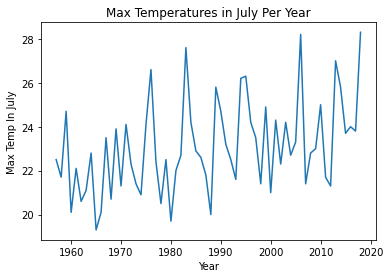

In [21]:
plt.plot(weather_results['Year'], weather_results['Tmax'])
plt.title('Max Temperatures in July Per Year')
plt.xlabel('Year')
plt.ylabel('Max Temp In July')

C.  Write a sentence about what you learn from the graph.

*Write your answer here.*
The Data fluctuates a good amount, with the lowent being 19 degrees and the highest being around 28 degrees. Over the years the average max temperature in July is slowly rising though

----

There are a few problems left to do, but we're gonna switch to a different database.  So let's close the one we've been working with.

----

### Closing the DB connection.

Throughout this whole file, we've kept our connection to the Datbase (the weather.db file) open.  

We must close the connection when done.

Run the following cell when you are done working on this HW.


In [22]:
curs.close()  #The ```curs``` (short for "cursor") was created way back at the beginning right after ```conn```.
              #We used it to recurse through the tables in teh DB and see which tables were included.
conn.close()

Now try running a select statment.  Since the database has been closed, you will see an error.  Specifically, you will see  this error: "ProgrammingError: Cannot operate on a closed database."

In [ ]:
#Create the sql statement
sql_statement = """SELECT *
                   FROM weather"""

#Run the query, passing it and the connection (conn) into the needed method.
#You get a dataframe with the results of the query.
weather_results = pd.read_sql_query(sql_statement, conn)

#Print the dataframe results.
weather_results

----

### NBA Salaries

Now we'll import the NBA Salaries from the 2015-2016 season for a few more practice problems.

Run the following cell and read the comments to remind yourself of how we connect to a SQLite DB.

Remember as well:  If you run the cell twice, it's no big deal but you will get a warning.  This is because the nba DB will have already been created.

In [24]:
#Load in the csv
nba = pd.read_csv('nba_salaries.csv')

#Make a connection to a database file ('nba.db'). If the file does not yet exist, it will be created.  
conn = sql.connect('nba.db')

#REMEMBER - The to_sql method writes records stored in a DataFrame to a SQLite database.
#It requires 2 inputs to run:
#     the name of TABLE inside the database file
#     and a connection to the database where the table lives.
#So essentially, the code below dumps the contents of the nba dataframe 
#     into a table called weather in a nba.db file.
nba.to_sql('nba', conn)

Let's select everything form the table, so you can remember what is in this nba dataset.

In [25]:
sql_statement = """SELECT *
                   FROM nba"""

nba_results = pd.read_sql_query(sql_statement, conn)
nba_results

,index,player,position,team,salary
0,0,Paul Millsap,PF,Atlanta Hawks,18.671659
1,1,Al Horford,C,Atlanta Hawks,12.000000
2,2,Tiago Splitter,C,Atlanta Hawks,9.756250
3,3,Jeff Teague,PG,Atlanta Hawks,8.000000
4,4,Kyle Korver,SG,Atlanta Hawks,5.746479
...,...,...,...,...,...
412,412,Gary Neal,PG,Washington Wizards,2.139000
413,413,DeJuan Blair,C,Washington Wizards,2.000000
414,414,Kelly Oubre Jr.,SF,Washington Wizards,1.920240
415,415,Garrett Temple,SG,Washington Wizards,1.100602


----

### Question 9.

Select all teams with 3 words in their team name.  

HINT:  
* Use LIKE.
* Answer: A table that is 110 rows X 5 columns



In [26]:
sql_statement = """SELECT*
                   FROM nba
                   WHERE team LIKE '% % %'"""

nba_results = pd.read_sql_query(sql_statement, conn)
nba_results


,index,player,position,team,salary
0,117,Klay Thompson,SG,Golden State Warriors,15.501000
1,118,Draymond Green,PF,Golden State Warriors,14.260870
2,119,Andrew Bogut,C,Golden State Warriors,13.800000
3,120,Andre Iguodala,SF,Golden State Warriors,11.710456
4,121,Stephen Curry,PG,Golden State Warriors,11.370786
...,...,...,...,...,...
105,361,David West,PF,San Antonio Spurs,1.499187
106,362,Boban Marjanovic,C,San Antonio Spurs,1.200000
107,363,Reggie Williams,SF,San Antonio Spurs,1.185784
108,364,Kyle Anderson,SF,San Antonio Spurs,1.142880


----
### Question 10.

Select a list of positions in the table.  Each position should be listed exactly once.

In [27]:
sql_statement = """SELECT DISTINCT position
                   FROM nba"""

nba_results = pd.read_sql_query(sql_statement, conn)
nba_results


,position
0,PF
1,C
2,PG
3,SG
4,SF


----
### Question 10.

Verify that Kentavious Caldwell-Pope has the longest name of the nba players by creating this table, exactly.  

The table should be sorted and have the same column names.

| player |              NUM_LETTERS |     |
|-------:|-------------------------:|-----|
|      0 | Kentavious Caldwell-Pope |  24 |
|      1 |  Rondae Hollis-Jefferson |  23 |
|      2 |  Michael Carter-Williams |  23 |
|      3 |   Michael Kidd-Gilchrist |  22 |
|      4 |   Thanasis Antetokounmpo |  22 |
|    ... |                      ... | ... |
|    412 |                John Wall |   9 |
|    413 |                Gary Neal |   9 |
|    414 |                 Alex Len |   8 |
|    415 |                 Ed Davis |   8 |
|    416 |                 Rudy Gay |   8 |

In [32]:
sql_statement = """SELECT player, LENGTH(player) AS NUM_LETTERS
                   FROM nba
                   ORDER BY NUM_LETTERS DESC
                   """

nba_results = pd.read_sql_query(sql_statement, conn)
nba_results


,player,NUM_LETTERS
0,Kentavious Caldwell-Pope,24
1,Rondae Hollis-Jefferson,23
2,Michael Carter-Williams,23
3,Michael Kidd-Gilchrist,22
4,Thanasis Antetokounmpo,22
...,...,...
412,John Wall,9
413,Gary Neal,9
414,Alex Len,8
415,Ed Davis,8


----
### Question 11.
 

Below, right the code to close the nba database.

Hint:  We never opened a cursor this time.  Just a connection.

In [33]:
#Code to close the nba conneciton here
conn.close()

---

Please save this file and submit!  Good job!